## Import Libraries

In [1]:
import skimage
from skimage import data
import skimage.transform
import skimage.io
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image = skimage.img_as_float(skimage.io.imread("Imagedata/lion.jpg")).astype(np.float32)

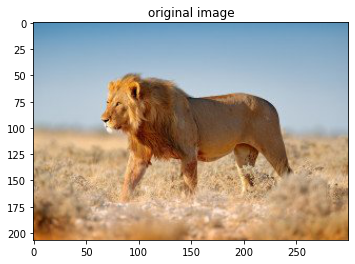

In [3]:
plt.title("original image")
plt.imshow(image)

In [4]:
image.shape

(207, 300, 3)

### Cropping 

In [5]:
def crop(image, crop_x, crop_y):
    
    y, x, c = image.shape
    
    # pixel positions to Start the crop
    startx = x//6 - (crop_x // 8)
    starty = y//4 - (crop_y // 4) 
    
    
    # pixel positions where to stop  the crop
    stopx = startx + crop_x
    stopy = starty + 2*crop_y
    
    return image[starty:stopy, startx:stopx]

In [6]:
image_croped = crop(image,128,56)

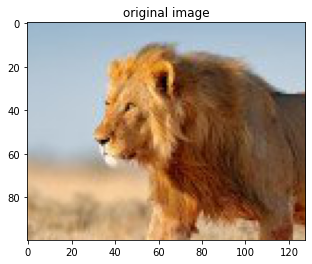

In [7]:
plt.title("original image")
plt.imshow(image_croped)

#### add noise to the image 

add gausian noise with bandwidth 

In [8]:
from skimage.util import random_noise

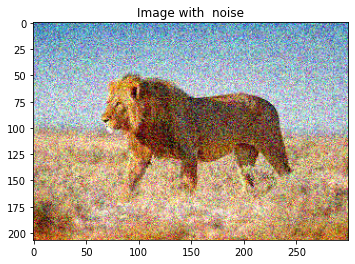

In [13]:
sigma = 0.155
image_noise = random_noise(image, var=sigma**2)

plt.title("Image with  noise")
plt.imshow(image_noise)

Denoising filters

In [14]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

estimate the noise level in a particular image 

In [16]:
sigma_est = estimate_sigma(image_noise, multichannel = True,average_sigmas=True)

In [17]:
sigma_est

0.14777521771662916

#### Denoisong

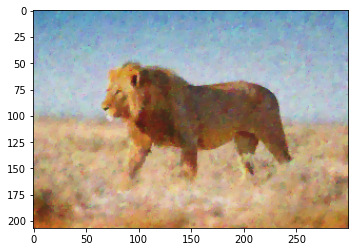

In [23]:
plt.imshow(denoise_tv_chambolle(image_noise, weight = 0.1, multichannel = True))

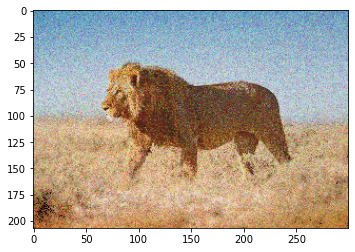

In [25]:
# bilateralfilter 
plt.imshow(denoise_bilateral(image_noise, sigma_color = 0.05, sigma_spatial=15, multichannel = True))

<ipython-input-29-5aec8f618067>:2: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  plt.imshow(denoise_wavelet(image_noise,multichannel = True))


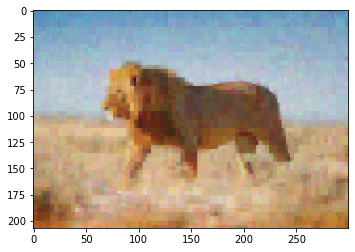

In [29]:
# wavelet filter 
plt.imshow(denoise_wavelet(image_noise,multichannel = True))

# flipping image 

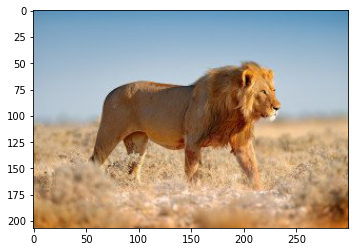

In [30]:
image_flip = np.fliplr(image)
plt.imshow(image_flip)

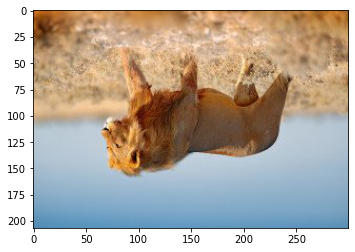

In [31]:
image_flip2 = np.flipud(image)

plt.imshow(image_flip2)